In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gp
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
# pd.set_option('display.max_columns', None)

In [86]:
import plotly.graph_objects as go

import pandas as pd

df=pd.read_csv('US_Accidents_Dec21_Updated.csv')
# pd.to_datetime(df[['Start_Time']], format="%Y/%m/%d")

In [87]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [90]:
missing_data=df.isna().sum().sort_values(ascending=False) / len(df) * 100

In [95]:
missing_data

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [121]:
y=[34,4,47,74]
y.remove(min(y))
y

[34, 47, 74]

In [124]:
def invert(lst):
    return [-x for x in lst]
invert(y)

[-34, -47, -74]

In [117]:
def sum_two_smallest_numbers(numbers):
#     list(map(int, numbers))
    x=min(numbers)
    numbers.remove(x)
    y=min(numbers)
    return x + y

sum_two_smallest_numbers([4,5,6,7,8,9])

9

In [106]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

<AxesSubplot:>

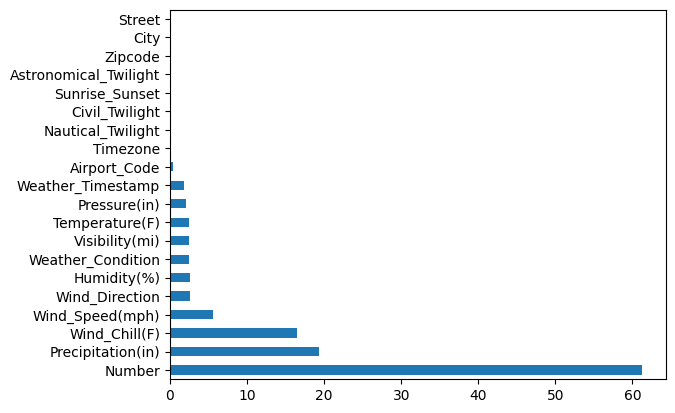

In [101]:
missing_data[missing_data!=0].plot(kind='barh')

In [47]:
fig = go.Figure(
        data=go.Scattergeo(
        lon = df['Start_Lng'],
        lat = df['Start_Lat'],
        text = df['Description'],
        mode = 'markers',
        marker_color = df['Severity'],
        ))

fig.update_layout(
        title = 'Car Accidents in the US',
        geo_scope='usa',
    )
fig.show()

In [48]:
df.keys()

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [54]:
fig2 = px.choropleth(df,
                     locations="State",
                     locationmode="USA-states",
                     color='Severity',
                     color_continuous_scale="Viridis",
#                      range_color=(0, 5),
                     scope="usa",
                     title =""
                     
                          )
fig2.show()

In [30]:
df3 = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df3

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5
...,...,...
3214,72145,13.9
3215,72147,10.6
3216,72149,20.2
3217,72151,16.9


In [12]:
import plotly.graph_objects as go

import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df1['text'] = df1['airport'] + '' + df1['city'] + ', ' + df1['state'] + '' + 'Arrivals: ' + df1['cnt'].astype(str)

fig1 = go.Figure(data=go.Scattergeo(
        lon = df1['long'],
        lat = df1['lat'],
        text = df1['text'],
        mode = 'markers',
        marker_color = df1['cnt'],
        ))

fig1.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
df1

,iata,airport,city,state,country,lat,long,cnt,text
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129,"Chicago O'Hare InternationalChicago, ILArrival..."
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925,"William B Hartsfield-Atlanta IntlAtlanta, GAAr..."
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662,Dallas-Fort Worth InternationalDallas-Fort Wor...
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290,"Phoenix Sky Harbor InternationalPhoenix, AZArr..."
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781,"Denver IntlDenver, COArrivals: 13781"
...,...,...,...,...,...,...,...,...,...
216,EAU,Chippewa Valley Regional,Eau Claire,WI,USA,44.865257,-91.485072,48,"Chippewa Valley RegionalEau Claire, WIArrivals..."
217,DBQ,Dubuque Municipal,Dubuque,IA,USA,42.402959,-90.709167,48,"Dubuque MunicipalDubuque, IAArrivals: 48"
218,RST,Rochester International,Rochester,MN,USA,43.908826,-92.497987,37,"Rochester InternationalRochester, MNArrivals: 37"
219,UTM,Tunica Municipal Airport,Tunica,MS,USA,34.681499,-90.348816,32,"Tunica Municipal AirportTunica, MSArrivals: 32"
